<h1 style="text-align: center;">Principal component analysis</h1>

# Teori

Akan dilakukan proyeksi dari data berdimensi $M$ menjadi berdimensi $D$.

PCA akan mendefinisikan $D$ vektor, $\mathbf{w}_{d}$, masing-masing berdimensi $M$. Elemen ke $d$ dari proyeksi $x_{nd}$ di mana $\mathbf{x}_{nd} = [ x_{n1}, x_{n2}, \ldots, x_{nD} ]^{\mathrm{T}}$ dihitung sebagai:

$$
x_{nd} = \mathbf{w}^{\mathrm{T}}_{d} \mathbf{y}_{n}
$$


Proses pembelajaran dalam hal ini adalah berapa dimensi $D$ dan memilih vektor proyeksi $\mathbf{w}_{d}$ untuk setiap dimensi.

PCA menggunakan variansi pada ruang yang diproyeksikan sebagai kriteria untuk memilih $\mathbf{w}_{d}$.

Misalnya: $\mathbf{w}_{1}$ adalah proyeksi yang akan membuat variansi pada $x_{n1}$ semaksimal mungkin.

Dimensi proyeksi kedua juga dipilih untuk memaksimalkan variansi, namum $\mathbf{w}_{2}$ harus ortogonal terhadap $\mathbf{w}_{1}$:
$$
\mathbf{w}_{1}^{\mathrm{T}} \mathbf{w}_{1} = 0
$$

Begitu juga untuk dimensi proyeksi yang ketiga dan seterusnya.

Secara umum:
$$
\mathbf{w}_{i}^{\mathrm{T}} \mathbf{w}_{j} = 0 \, \forall\, j \neq i
$$

Asumsi:
$$
\bar{\mathbf{y}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n} = 0
$$

Misalkan kita ingin mencari proyeksi ke $D=1$ dimensi, dalam kasus ini hasil proyeksi adalah nilai skalar $x_{n}$ untuk tiap observasi yang diberikan oleh:
$$
x_{n} = \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
$$
dan variansi $\sigma^{2}_{x}$ diberikan oleh:
$$
\sigma^{2}_{x} = \frac{1}{N} \sum_{n=1}^{N} \left( x_{n} - \bar{x} \right)^2
$$

Dengan asumsi bahwa $\bar{y} = 0$:
$$
\begin{align}
\bar{x} & = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \\
& = \mathbf{w}^{\mathsf{T}} \left(
\frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n}
\right) \\
& = \mathbf{w}^{\mathsf{T}} \bar{\mathbf{y}} \\
& = 0
\end{align}1
$$

sehingga variansinya menjadi:
$$
\begin{align}
\sigma_{x}^{2} & = \frac{1}{N} \sum_{n=1}^{N} x^{2}_{n} \\
& = \frac{1}{N} \sum_{n=1}^{N} \left(
\mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \right)^2 \\
& = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
\mathbf{y}_{n}^{\mathsf{T}} \mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} 
\left( \frac{1}{N} \sum_{n=1}^{N}
\mathbf{y}_{n} \mathbf{y}_{n}^{\mathsf{T}}
\right)
\mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} \mathbf{C} \mathbf{w}
\end{align}
$$

$\mathbf{C}$ adalah matriks kovariansi dari sampel:
$$
\mathbf{C} = \frac{1}{N} \sum_{n=1}^{N}
(\mathbf{y}_{n} - \bar{\mathbf{y}})
(\mathbf{y}_{n} - \bar{\mathbf{y}})^{\mathsf{T}}
$$
di mana $\bar{\mathbf{y}} = 0$ dalam kasus yang kita tinjau.


# Kode program

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import IPython
IPython.display.set_matplotlib_formats("svg")

Generate data:

In [3]:
np.random.seed(1234)

In [53]:
Y_1 = np.random.randn(20,2)
Y_2 = np.random.randn(20,2) + 10
Y_3 = np.random.randn(20,2) - 10

In [54]:
Y = np.concatenate( (Y_1, Y_2, Y_3), axis=0 );

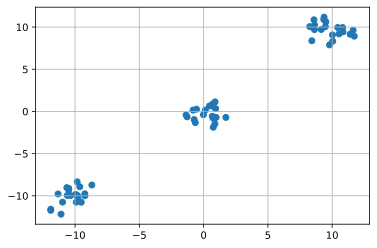

In [34]:
plt.clf()
plt.scatter(Y[:,0], Y[:,1])
plt.grid()

Add random dimensions:

In [56]:
Ndata = Y.shape[0]
Y = np.concatenate( (Y, np.random.randn(Ndata,5)), axis=1 )

In [37]:
labels = np.concatenate( ([0]*20, [1]*20, [2]*20) )

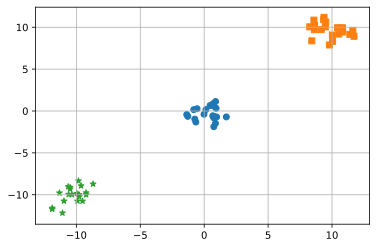

In [38]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Y[idx,0], Y[idx,1], marker=markers[i])
plt.grid()

Hitung rata-rata: $\bar{\mathbf{y}}$, gunakan metode `np.mean`.

In [74]:
ybar = np.mean(Y,axis=0)
ybar

array([ 0.11192174, -0.03304311,  0.19846684,  0.1834116 ,  0.20693906,
        0.02297131,  0.11895082])

Geser data terhadap rata-rata:

In [64]:
Yshifted = Y - ybar

Rata-rata dari data yang sekarang seharusnya adalah nol (vektor).

In [75]:
np.mean(Yshifted,axis=0)

array([ 3.55271368e-16, -1.30266168e-15,  2.96059473e-17, -3.88578059e-17,
       -9.25185854e-17,  5.20417043e-17,  2.26670534e-17])

Hitung matriks kovariansi: $\mathbf{C}$

$$
\mathbf{C} = \frac{1}{N} \mathbf{Y}^{\mathsf{T}} \mathbf{Y}
$$

In [76]:
N = Yshifted.shape[0]
N

60

In [82]:
C = np.matmul( Yshifted.transpose(), Yshifted )/N

Hitung pasangan eigen dari matriks kovariansi:

In [119]:
λ_unsrt, w_unsrt = np.linalg.eig(C)

(Lakukan sort jika perlu)

In [120]:
idx_sorted = np.argsort(λ_unsrt)[::-1]

In [121]:
λ = λ_unsrt[idx_sorted]

In [122]:
λ

array([133.18826225,   1.4386642 ,   1.2568496 ,   1.06281272,
         0.82368346,   0.63765111,   0.49838829])

In [123]:
w = w_unsrt[:,idx_sorted]

Perbandingan nilai eigen (variansi)

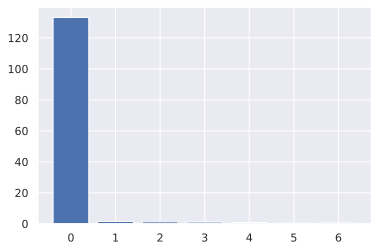

In [124]:
plt.bar(range(len(λ)), λ)
plt.grid()
plt.grid()

Lakukan proyeksi (rotasi):

$$
\mathbf{X} = \mathbf{Y} \mathbf{W}
$$

Proyeksikan data ke dua dimensi pertama:

In [135]:
Yproj = np.matmul(Y, w[:,0:2] )

In [136]:
Yproj.shape

(60, 2)

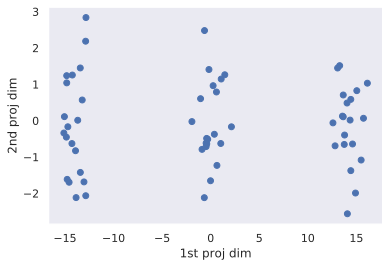

In [137]:
plt.scatter(Yproj[:,0], Yproj[:,1])
plt.xlabel("1st proj dim")
plt.ylabel("2nd proj dim")
plt.grid()

Hanya memproyeksikan ke 1st proj dim (nilai eigen paling besar):

In [128]:
Yproj_1 = np.matmul(Y, w[:,0:1] )
Yproj_1.shape

(60, 1)

Text(0.5, 0, 'proj dim 1st')

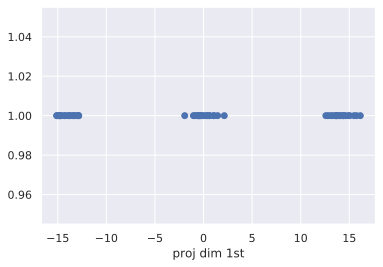

In [138]:
plt.plot(Yproj_1, np.ones(Yproj_1.shape[0]), marker="o", lw=0)
plt.xlabel("proj dim 1st")

**NOTE: sumbu x bukan menyatakan fitur pertama (desc1), namum fitur (dimensi) yang sudah ditransformasi.**

Bagaimana jika data diproyeksi ke dimensi proyeksi ke-dua saja?

(60,)


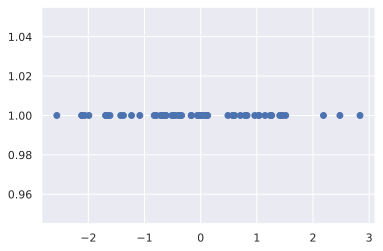

In [130]:
Yproj_2 = np.matmul(Y, w[:,1] )
print(Yproj_2.shape)
plt.plot(Yproj_2, np.ones(Yproj_2.shape[0]), marker="o", lw=0)

# Pair plot

In [40]:
import pandas as pd

In [41]:
import seaborn as sns
sns.set()

In [42]:
labelsString = []
for i in range(len(labels)):
    labelsString.append("class"+str(labels[i]))

In [58]:
columns = ["desc"+str(i) for i in range(1,8)]
columns

['desc1', 'desc2', 'desc3', 'desc4', 'desc5', 'desc6', 'desc7']

In [57]:
Ypd = pd.DataFrame(Y, columns=columns)

In [43]:
labelsDF = pd.DataFrame(labelsString, columns=["class"])
labelsDF.head()

,class
0,class0
1,class0
2,class0
3,class0
4,class0


In [59]:
YDF = pd.merge(Ypd, labelsDF, left_index=True, right_index=True)
YDF.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7,class
0,1.155392,-1.481918,-1.302961,0.244867,0.679017,1.660738,-2.031270,class0
1,0.820604,0.073051,-0.435330,-0.879836,0.128832,0.055341,1.472033,class0
2,0.313431,1.818929,0.525388,-1.110956,-0.189566,0.825640,2.470242,class0
3,-1.253967,1.558385,0.311087,-0.583719,0.580509,0.832613,-0.538231,class0
4,0.960892,-0.935691,0.261326,0.457332,-0.209658,-1.733199,0.576554,class0


In [44]:
columns = ["desc"+str(i) for i in range(1,8)]
columns

['desc1', 'desc2', 'desc3', 'desc4', 'desc5', 'desc6', 'desc7']

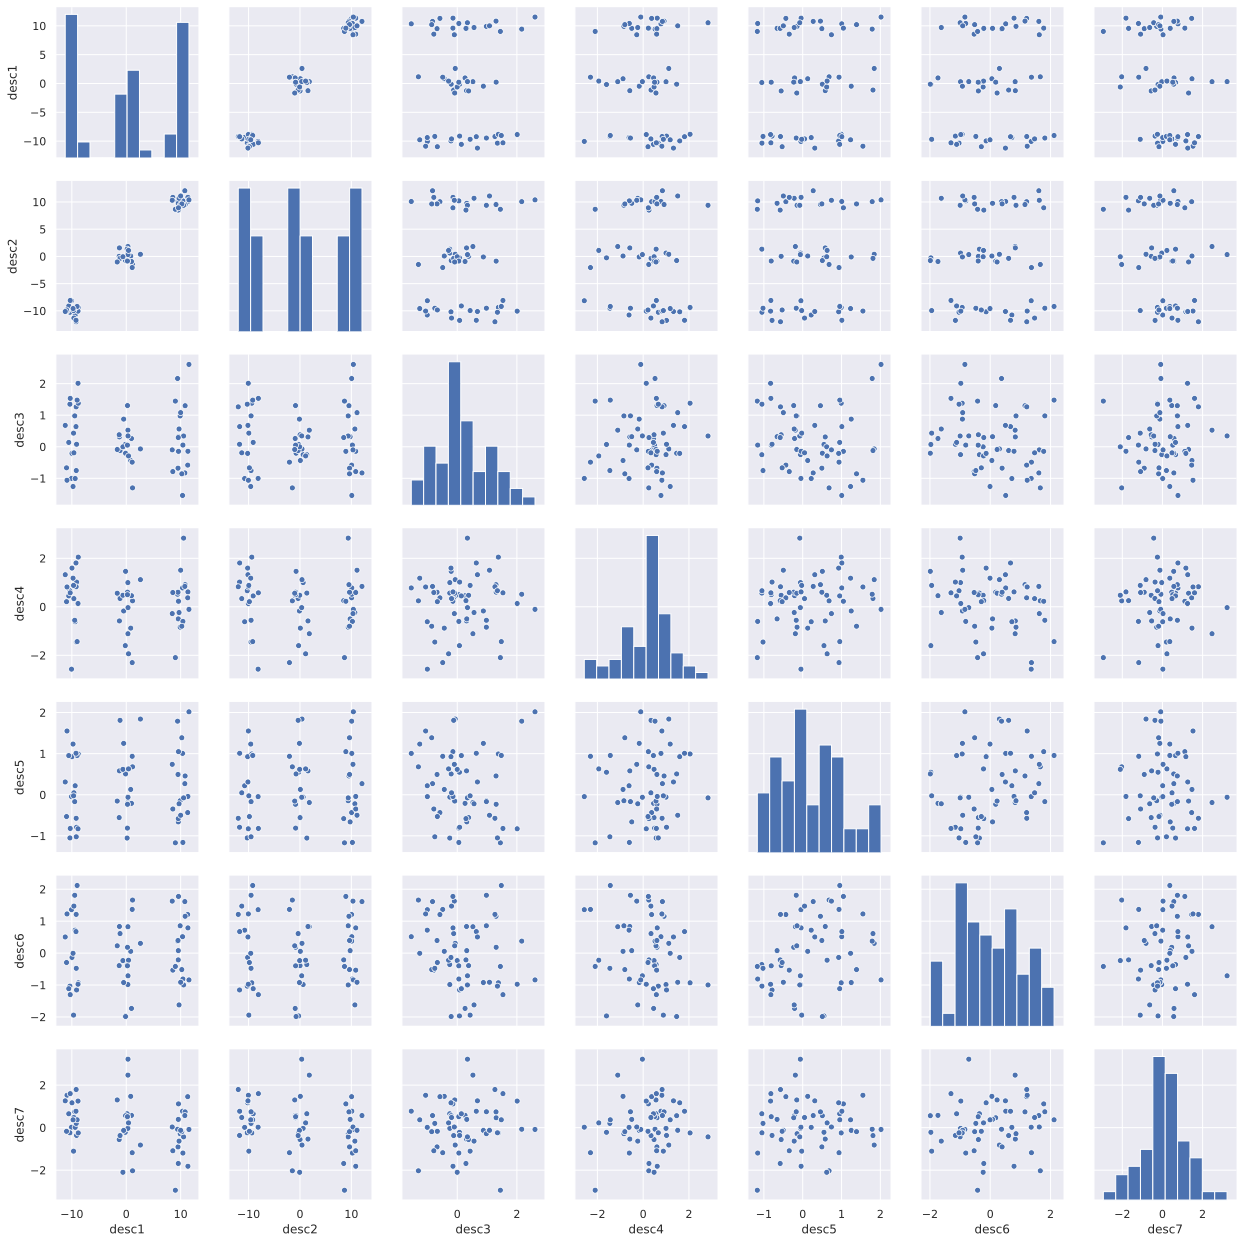

In [61]:
sns.pairplot(YDF)

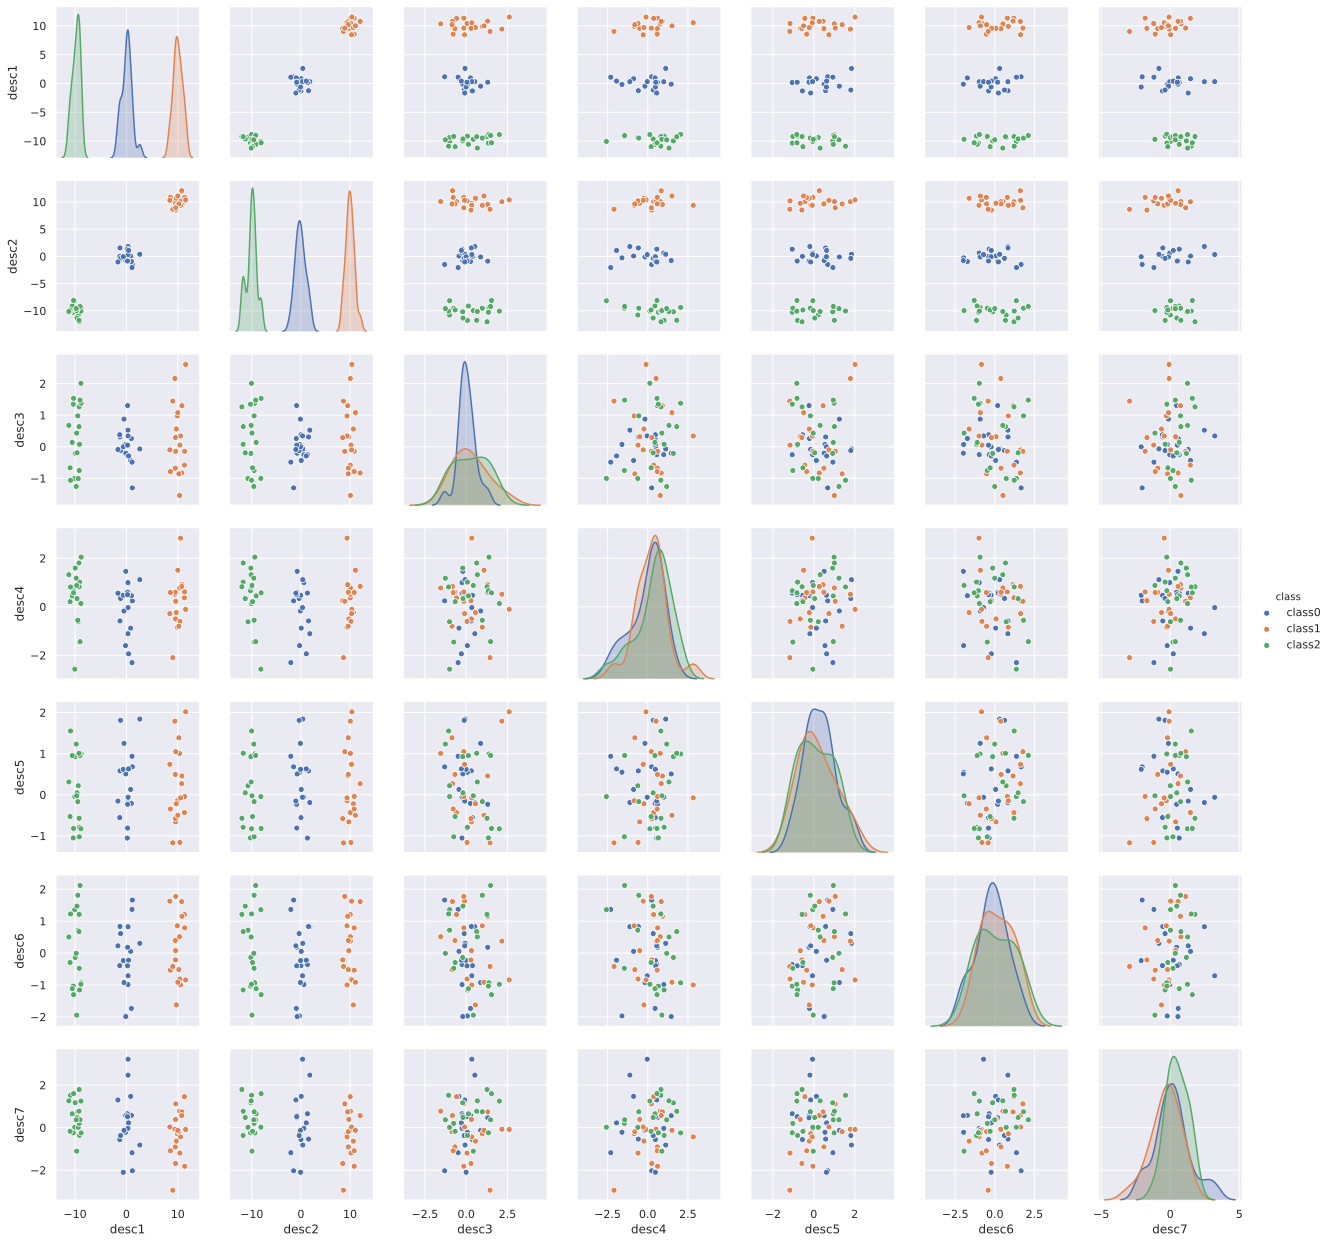

In [62]:
sns.pairplot(YDF, hue="class")

In [139]:
YDF.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7,class
0,0.471435,-1.190976,-0.748528,-0.108125,0.274779,0.237350,-0.259844,0
1,1.432707,-0.312652,-0.312442,0.448510,-0.059532,-0.470015,0.349567,0
2,-0.720589,0.887163,-1.027469,-0.306638,1.406176,-1.249697,-1.560149,0
3,0.859588,-0.636524,1.557398,-0.593356,-0.170289,1.672627,-0.540800,0
4,0.015696,-2.242685,-0.684128,0.599962,-0.217199,0.331527,-0.383365,0


In [146]:
YDF.loc[:,:"desc7"].head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7
0,1.155392,-1.481918,-1.302961,0.244867,0.679017,1.660738,-2.031270
1,0.820604,0.073051,-0.435330,-0.879836,0.128832,0.055341,1.472033
2,0.313431,1.818929,0.525388,-1.110956,-0.189566,0.825640,2.470242
3,-1.253967,1.558385,0.311087,-0.583719,0.580509,0.832613,-0.538231
4,0.960892,-0.935691,0.261326,0.457332,-0.209658,-1.733199,0.576554


# Coba lagi:

In [149]:
Y = []

In [150]:
Y_1 = np.random.randn(20,2)
Y_2 = np.random.randn(20,2) + 10
Y_3 = np.random.randn(20,2) - 10
Y_4 = np.random.randn(20,2) + np.array([-10,10])
Y_5 = np.random.randn(20,2) + np.array([10,-10])

In [151]:
Y = np.concatenate( (Y_1, Y_2, Y_3, Y_4, Y_5), axis=0 );

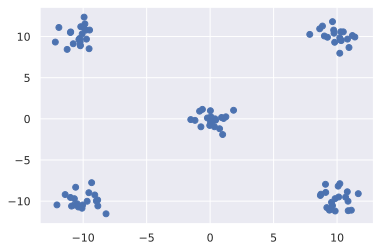

In [152]:
plt.clf()
plt.scatter(Y[:,0], Y[:,1])

In [153]:
Ndata = Y.shape[0]
Y = np.concatenate( (Y, np.random.randn(Ndata,5)), axis=1 )

In [155]:
ybar = np.mean(Y,axis=0)
ybar

array([-0.07997064,  0.06284219, -0.07526404,  0.02804106,  0.06896525,
        0.00929804, -0.01918037])

In [156]:
Yshifted = Y - ybar

In [157]:
np.mean(Yshifted,axis=0)

array([-8.70414851e-16, -4.08562073e-16, -7.07767178e-17,  1.83186799e-17,
       -6.88338275e-17, -1.60982339e-17,  1.24344979e-16])

In [158]:
N = Yshifted.shape[0]
N

100

In [159]:
C = np.matmul( Yshifted.transpose(), Yshifted )/N

In [160]:
λ_unsrt, w_unsrt = np.linalg.eig(C)

In [161]:
λ_unsrt

array([82.39285878, 80.24405475,  1.44920226,  0.74337577,  0.90870514,
        1.09998414,  1.04621065])

In [162]:
idx_sorted = np.argsort(λ_unsrt)[::-1]
idx_sorted

array([0, 1, 2, 5, 6, 4, 3])

In [163]:
W = w_unsrt[:,idx_sorted]
λ = λ_unsrt[idx_sorted]

In [164]:
λ

array([82.39285878, 80.24405475,  1.44920226,  1.09998414,  1.04621065,
        0.90870514,  0.74337577])

<BarContainer object of 7 artists>

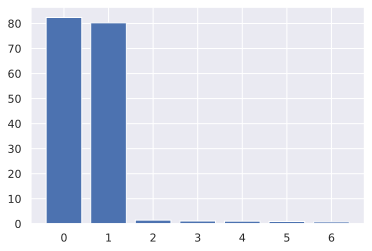

In [166]:
plt.bar(np.arange(len(λ)), λ)